# Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1

In [29]:
file_path = '/content/drive/My Drive/ML_24-25/Data/diabetes_clean.csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['diabetes'])
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

predicted = model.predict_proba(X_test)[:, 1]

print(predicted[:10])


[0.22826832 0.29828073 0.7256234  0.63181147 0.44263912 0.07905416
 0.72622364 0.12511034 0.04289454 0.35174058]


# Task 2

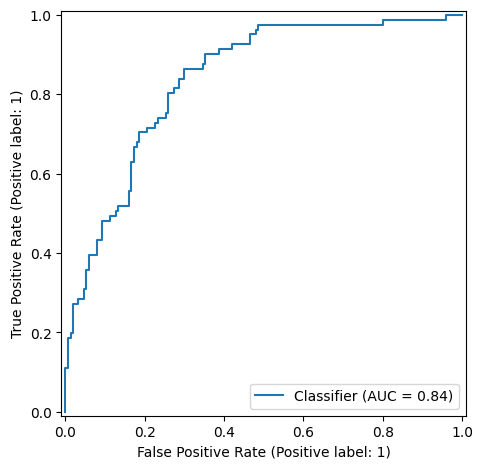

In [ ]:
metrics.RocCurveDisplay.from_predictions(y_test, predicted)
plt.tight_layout()
plt.show()

#C. The model is much better than randomly guessing the class of each observation.

# Task 3

KNN AUC: 0.7277366255144033
KNN Metrics:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       150
           1       0.62      0.51      0.56        81

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231

Logistic Regression AUC: 0.8375308641975308
Logistic Regression Metrics:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



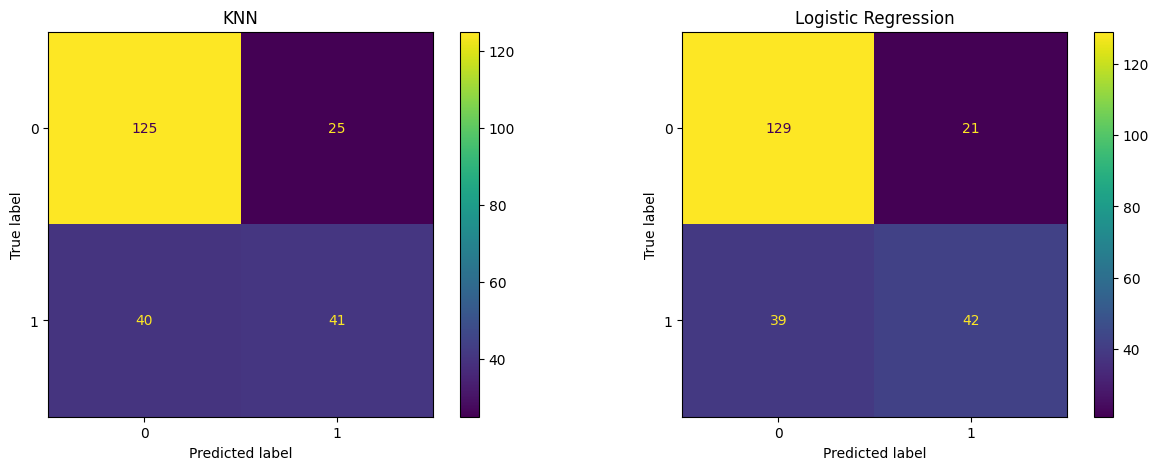

In [ ]:
file_path = '/content/drive/My Drive/ML_24-25/Data/diabetes_clean.csv'
data = pd.read_csv(file_path)
X = data.drop(columns=['diabetes'])
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

log_reg = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_test)
knn_preds = knn.predict(X_test)

log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]

logreg_auc = metrics.roc_auc_score(y_test, log_reg_probs)
knn_auc = metrics.roc_auc_score(y_test, knn_probs)

logreg_cm = metrics.confusion_matrix(y_test, log_reg_preds)
knn_cm = metrics.confusion_matrix(y_test, knn_preds)


print("KNN AUC:", knn_auc)
print("KNN Metrics:\n", metrics.classification_report(y_test, knn_preds))

print("Logistic Regression AUC:", logreg_auc)
print("Logistic Regression Metrics:\n", metrics.classification_report(y_test, log_reg_preds))

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
metrics.ConfusionMatrixDisplay(knn_cm).plot(ax=axes[0])
axes[0].set_title("KNN")
metrics.ConfusionMatrixDisplay(logreg_cm).plot(ax=axes[1])
axes[1].set_title("Logistic Regression")
plt.show()

# Although there is a significant difference in AUC, I would say that Logistic Regression only slightly outperforms KNN.
# Given the situation, I would consider precision the more important metric.

# Task 4

In [32]:
data = pd.read_csv(file_path)
X = data.drop(columns='glucose')
y = data['glucose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(random_state=42)

param_grid = {'alpha': np.logspace(-5, 0, 20)}
grid_search = GridSearchCV(lasso, param_grid, cv=6)
grid_search.fit(X_train, y_train)

print(f"Tuned lasso parameters: {grid_search.best_params_}")
print(f"Tuned lasso score: {grid_search.best_score_}")

# Using optimal hyperparameters may improve the model, but it does not guarantee high performance.
# This is because the algorithm being used might not be ideal to the nature of the data.
# In this case, the score is just 0.34, indicating that the Lasso algorithm is not well-suited.

Tuned lasso parameters: {'alpha': 1e-05}
Tuned lasso score: 0.34180178243390347


# Task 5

In [27]:
file_path = '/content/drive/My Drive/ML_24-25/Data/diabetes_clean.csv'
df = pd.read_csv(file_path)
X = df.drop(columns='diabetes')
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_distributions = {
    'penalty': ['l1', 'l2'],
    'tol': np.linspace(0.0001, 1.0, 50),
    'C': np.linspace(0.1, 1.0, 50),
    'class_weight': ['balanced', {0: 0.8, 1: 0.2}],
}

log_reg = LogisticRegression(random_state=42, solver='saga', max_iter=1000) #Using 'saga' solver as it supports 'l1' and 'l2'
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions,
    n_iter=100,
    random_state=42,
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Tuned Logistic Regression Parameters: {best_params}")
print(f"Tuned Logistic Regression Best Accuracy Score: {best_score}")

Tuned Logistic Regression Parameters: {'tol': 0.8163448979591836, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.5775510204081633}
Tuned Logistic Regression Best Accuracy Score: 0.6499134648667357
